In [347]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline

import urllib.request

Actualizamos el número máximo de filas que podemos ver al mostrar un objeto $pandas$

In [348]:
pd.options.display.max_rows = 999

Descargamos, desde su url, los datos de interés:

In [349]:
github_url = 'https://github.com/mharias/covid/blob/master/Escovid19_provincias.ipynb'

In [350]:
hashtag_fuente='#escovid19'

In [351]:
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

In [352]:
df = pd.read_csv(path_montera34)

In [353]:
df

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,...,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,source_name,source,comments
0,2020-01-31,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
1,2020-01-31,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
2,2020-01-31,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
3,2020-01-31,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
4,2020-01-31,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10559,2020-08-21,Segovia,40,Castilla y León,55.0,NaN,NaN,NaN,14.0,2.0,...,55.0,31.6,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10560,2020-08-21,Sevilla,41,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,97.0,72.6,0.0,0.0,0.0,0.1,1.0,NaN,NaN,NaN
10561,2020-08-21,Soria,42,Castilla y León,24.0,NaN,NaN,NaN,11.0,0.0,...,24.0,15.7,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10562,2020-08-21,Valladolid,47,Castilla y León,126.0,NaN,NaN,NaN,37.0,4.0,...,126.0,68.7,0.0,0.0,0.0,0.3,2.0,NaN,NaN,NaN


veamos una rápida descripción de la información:

In [354]:
df.describe()

,ine_code,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,...,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week
count,10564.000000,3372.000000,2190.000000,770.000000,1113.000000,6533.000000,6297.000000,7792.000000,5354.000000,5597.000000,...,5155.000000,5223.000000,4664.000000,5605.000000,5271.000000,7561.000000,7168.0,7155.000000,7430.00000,6595.000000
mean,26.514483,78.833630,66.631507,2157.467532,835.971249,200.543854,27.498968,546.596509,3946.827232,5590.046632,...,312.869447,63.845874,66.565437,51.656735,51.280326,4.661024,inf,4.891866,4.71825,36.797119
std,15.002448,369.992454,176.442513,10401.577669,1272.314204,930.374452,106.949450,1728.333886,10434.017577,13672.482762,...,1141.388455,195.600794,189.084343,197.260056,187.000187,23.939922,NaN,24.338648,23.66733,175.459915
min,1.000000,-67.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-107.000000,-106.000000,-11.700000,-97.000000,-12.700000,-22.000000,-30.8,-1.300000,-0.60000,-4.000000
25%,14.000000,2.000000,3.000000,4.000000,132.000000,7.000000,1.000000,56.000000,512.250000,1240.000000,...,9.000000,3.000000,4.900000,1.000000,1.600000,0.000000,0.0,0.000000,0.00000,0.000000
50%,27.000000,13.000000,12.000000,21.500000,371.000000,29.000000,4.000000,171.000000,1655.500000,2238.000000,...,31.000000,17.000000,21.900000,5.000000,5.400000,0.000000,0.0,0.300000,0.40000,3.000000
75%,40.000000,46.000000,49.000000,372.750000,1071.000000,117.000000,18.000000,344.000000,3158.000000,3989.000000,...,151.000000,55.000000,56.600000,24.000000,24.950000,2.000000,1.5,2.700000,2.60000,21.000000
max,52.000000,4623.000000,2030.000000,64423.000000,10275.000000,15227.000000,1528.000000,11285.000000,84478.000000,103337.000000,...,16223.000000,3374.000000,2491.400000,3460.000000,2561.400000,377.000000,inf,350.700000,339.00000,2373.000000


In [355]:
df.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,...,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,source_name,source,comments
0,2020-01-31,Albacete,2,Castilla - La Mancha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
1,2020-01-31,Alicante/Alacant,3,Comunitat Valenciana,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
2,2020-01-31,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
3,2020-01-31,Araba/Álava,1,País Vasco,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
4,2020-01-31,Asturias,33,"Asturias, Principado de",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN


In [356]:
df['province'].unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

En la [url](https://data.world/covid-19-data-resource-hub/covid-19-case-counts/workspace/file?filename=COVID-19+Cases.csv) del proyecto vemos la descripción de cada uno de los campos.

Vamos a formatear correctamente la columna $Date$, para posteriormente ordenar el $pandas$ por fecha creciente:

In [357]:
df['date']=pd.to_datetime(df['date'])

In [358]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'source_name', 'source',
       'comments'],
      dtype='object')

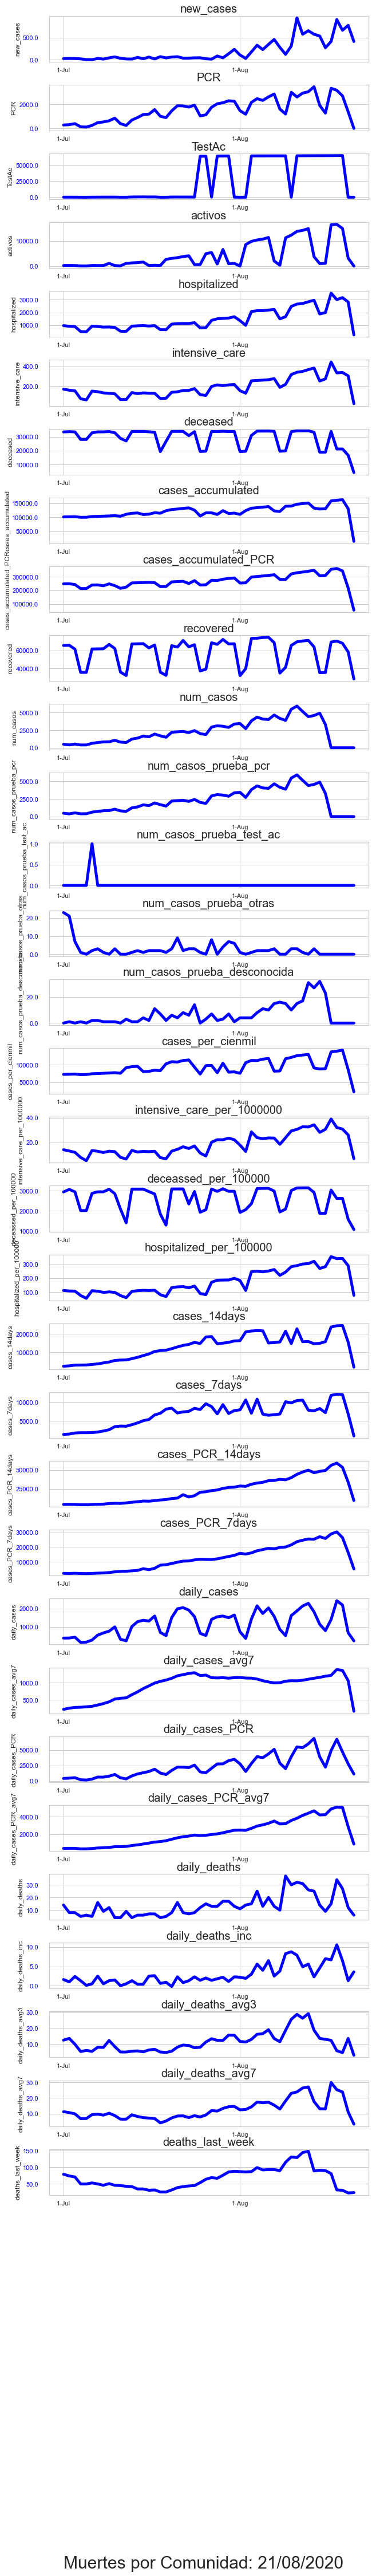

In [359]:
def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparar datos
a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
    
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Muertes por Comunidad: '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("RdBu_r",19))


for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

/opt/anaconda3/envs/datascience/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


<Figure size 432x288 with 0 Axes>

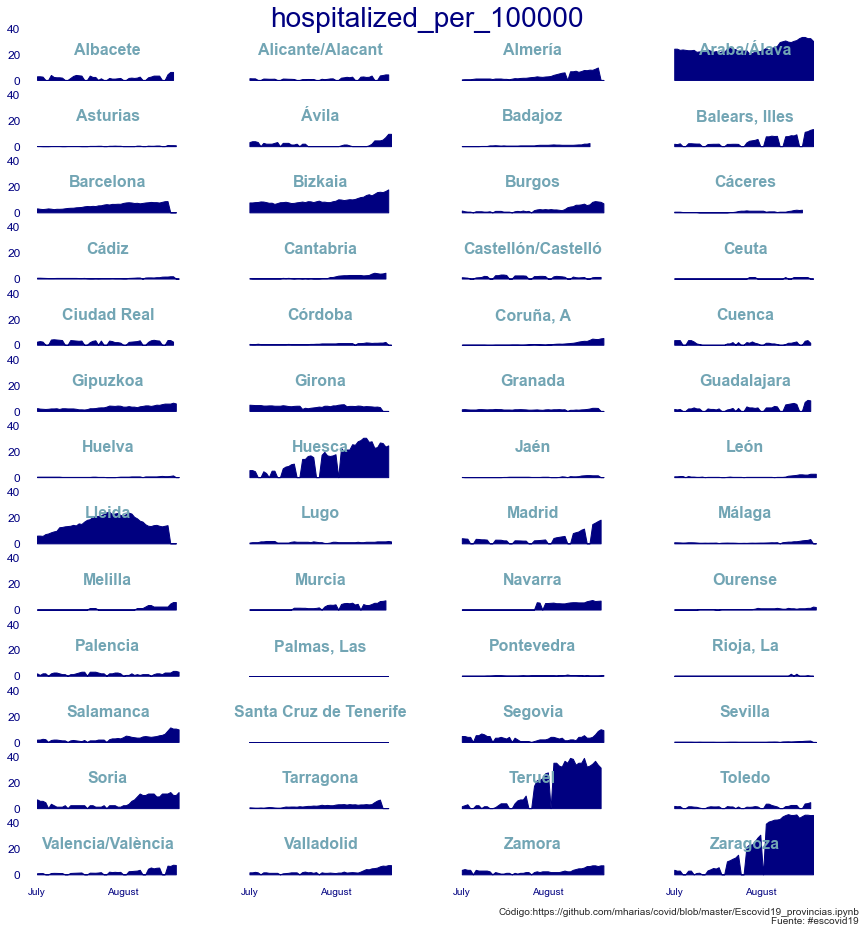

In [369]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Preparamos los datos
andalucia=['Huelva','Sevilla','Málaga','Cádiz','Córdoba','Granada','Almería','Jaén']
datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
#datos = datos[datos['province'].isin(andalucia)]
#clave='intensive_care_per_1000000'
#clave='PCR'
#clave='deaths_last_week'
clave='hospitalized_per_100000'
#clave='cases_per_cienmil'
#clave='daily_cases_PCR_avg7'
#datos = datos[['date','province','PCR']].fillna(0,axis=1)

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, height=1, palette=pal)
# Título
g.fig.suptitle('{}'.format(clave),fontsize=28,color='navy')
g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
g.fig.text(1,0.01,'Código:{}'.format(github_url),
           fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps
g.map(plt.fill_between, 'date',clave,color='navy')
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=pal[10],
            ha="center", va="center", size=16,transform=ax.transAxes)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=10,labelcolor='navy')
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))

# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)

plt.show()


sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Provincias específicas

<Figure size 432x288 with 0 Axes>

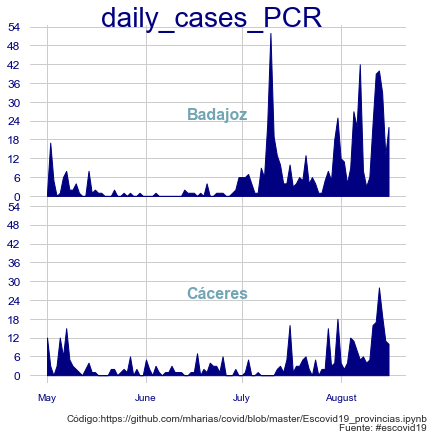

In [361]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Preparamos los datos
provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=1)) & (datos['province'].isin(provincias))]
#datos = datos[datos['province'].isin(andalucia)]
#clave='intensive_care_per_1000000'
clave='PCR'
#clave='deaths_last_week'
#clave='hospitalized_per_100000'
#clave='cases_per_cienmil'
clave='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
#clave = 'new_cases'
#datos = datos[['date','province','PCR']].fillna(0,axis=1)

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=1,aspect=2, height=3, palette=pal)
# Título
g.fig.suptitle('{}'.format(clave),fontsize=28,color='navy')
g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
g.fig.text(1,0.02,'Código:{}'.format(github_url),
           fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps
g.map(plt.fill_between, 'date',clave,color='navy')
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=pal[10],
            ha="center", va="center", size=16,transform=ax.transAxes)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=10,labelcolor='navy')
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
    ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax.grid()

# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)

plt.show()


sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


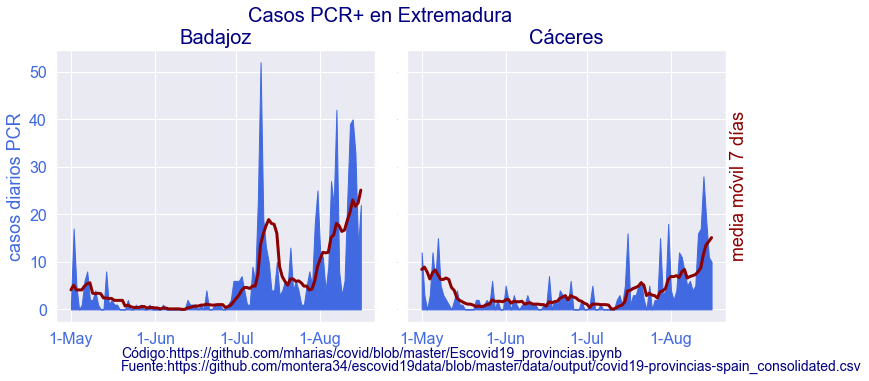

In [362]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=5,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# preparamos gráfico
sns.set(style="darkgrid")
f = plt.figure(figsize=(12,5))

f.suptitle('Casos PCR+ en Extremadura',fontsize=20,x=0.5,y=1,color=color_titulos)
f.subplots_adjust(hspace=0, wspace=0.1)


ax1 = f.add_subplot(1,2,1)
ax1.fill_between(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave],color=color_diarios)
ax1.set_ylabel('casos diarios PCR',size=18,color=color_diarios)
ax1.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax1.yaxis.set_tick_params(labelsize=16,labelcolor=color_diarios,width=0)
ax1.set_title('Badajoz',size=20,color=color_titulos)
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax2 = ax1.twinx()

ax2.set_ylim(ax1.get_ylim())

ax2.plot(datos['date'].unique(), datos[datos['province'] == 'Badajoz'][clave_avg], lw=3, color=color_avg)
ax2.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax2.xaxis.set_major_formatter(majorFmt)
#ax2.set_ylabel('media móvil 7 días',size=18,color='red')
ax2.set_yticks([])


ax3 = f.add_subplot(1,2,2)
ax3.fill_between(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave],color=color_diarios)
#ax3.set_ylabel('casos diarios PCR',size=18,color='navy')
ax3.xaxis.set_tick_params(labelsize=16,labelcolor=color_diarios)
ax3.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_diarios)
#ax3.set_yticks([])
#ax.bar(tiempo,valores,label='sin',color=colors,width=.25)
ax3.set_title('Cáceres',size=20,color=color_titulos)
ax3.set_ylim(ax2.get_ylim())

ax4 = ax3.twinx()
ax4.grid(axis='both')
ax4.set_ylim(ax3.get_ylim())

ax4.plot(datos['date'].unique(), datos[datos['province'] == 'Cáceres'][clave_avg], lw=3, color=color_avg)
ax4.xaxis.set_major_locator(DayLocator([1]))
majorFmt = DateFormatter('%-d-%b')
ax4.xaxis.set_major_formatter(majorFmt)
ax4.set_ylabel('media móvil 7 días',size=18,color=color_avg)
ax4.set_yticks([])

f.text(0.2, 0.0, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,transform=f.transFigure,color=color_titulos)

f.text(0.2,0.025,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',transform=f.transFigure,color=color_titulos)

plt.show()

<Figure size 432x288 with 0 Axes>

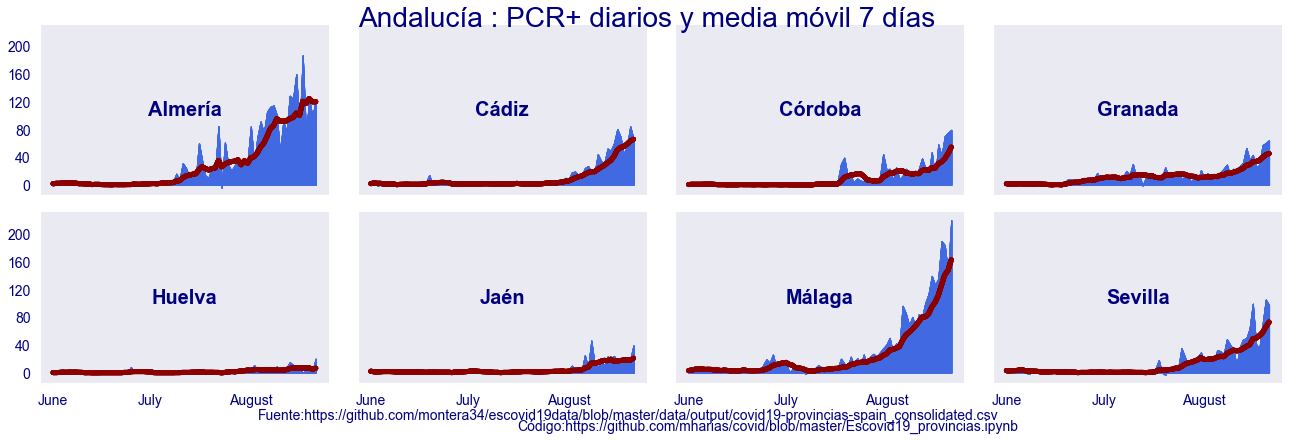

In [363]:
# Preparamos los datos

provincias=['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Andalucía : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.2, 0.035, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.4,0.0,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

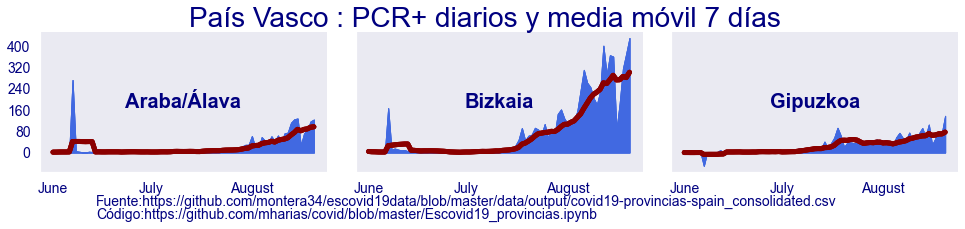

In [364]:
# Preparamos los datos

provincias=['Bizkaia','Araba/Álava','Gipuzkoa']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('País Vasco : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.1, 0.08, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.1,0.0,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

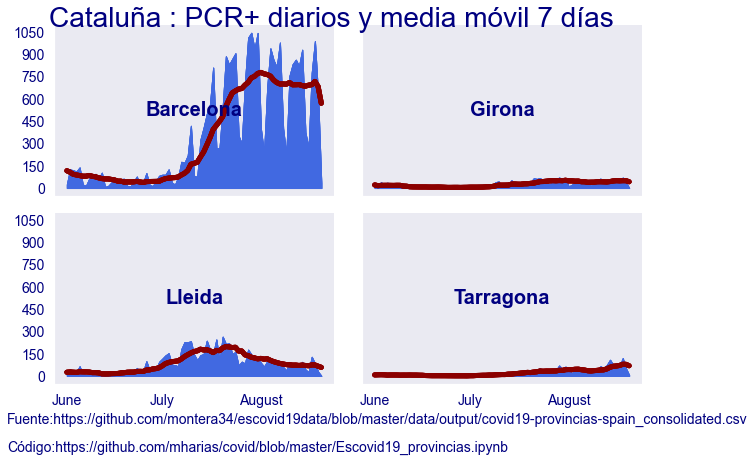

In [365]:
# Preparamos los datos

provincias=['Barcelona','Girona','Lleida','Tarragona']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Cataluña : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

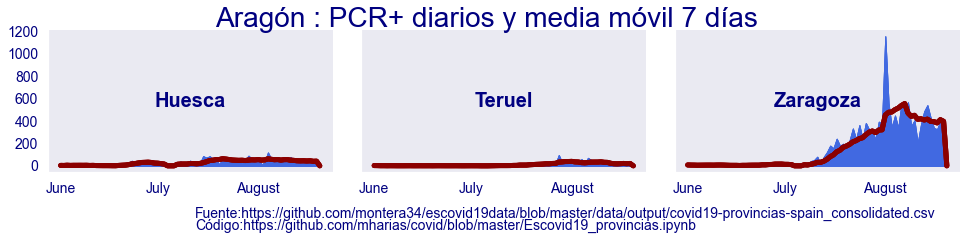

In [366]:
# Preparamos los datos

provincias=['Zaragoza','Teruel','Huesca']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=3,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Aragón : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.2, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.2,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

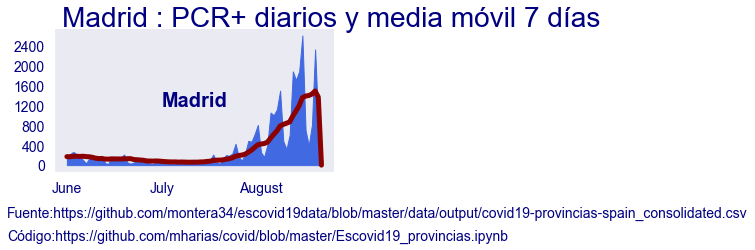

In [367]:
# Preparamos los datos

provincias=['Madrid']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Madrid : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0,-0.1,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

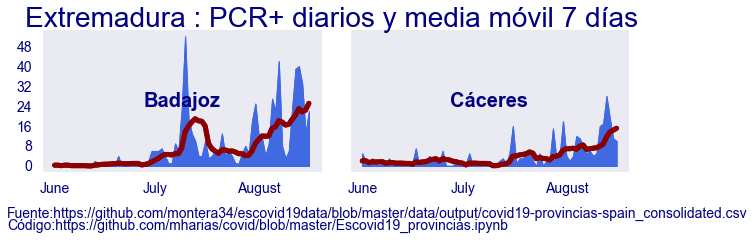

In [368]:
# Preparamos los datos

provincias=['Badajoz','Cáceres']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Extremadura : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

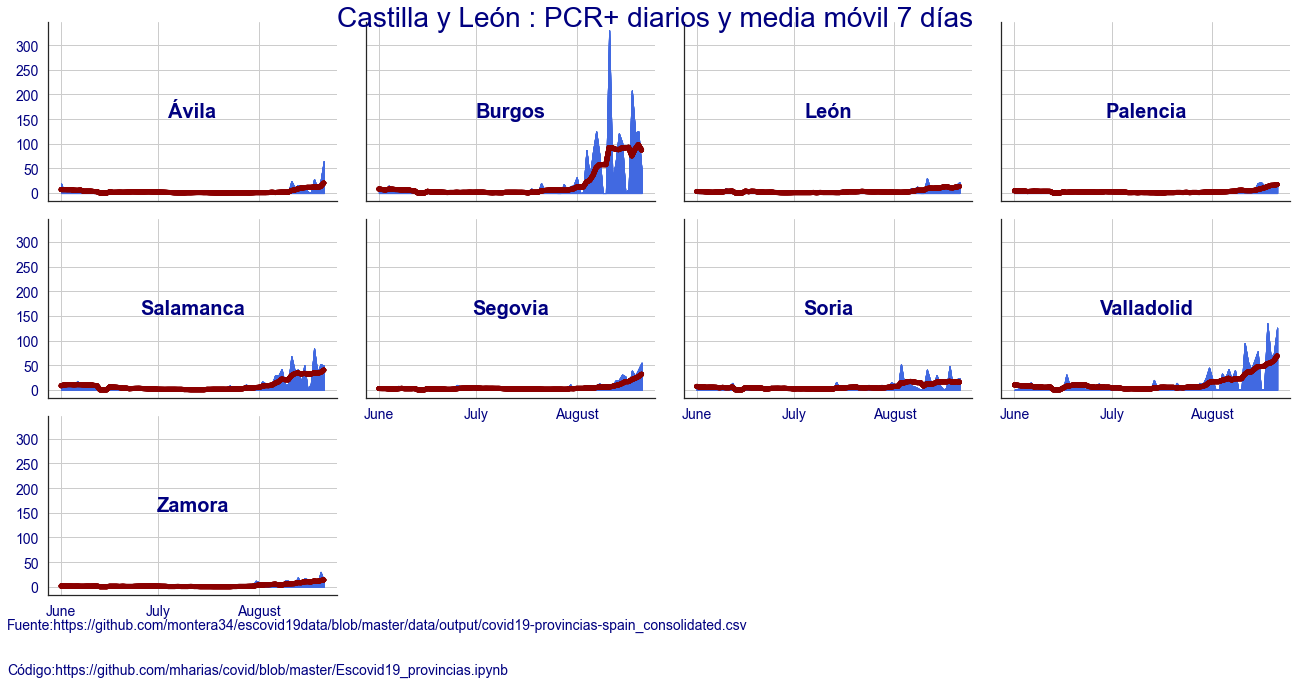

In [371]:
# Preparamos los datos

provincias=['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Castilla y León : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()

<Figure size 432x288 with 0 Axes>

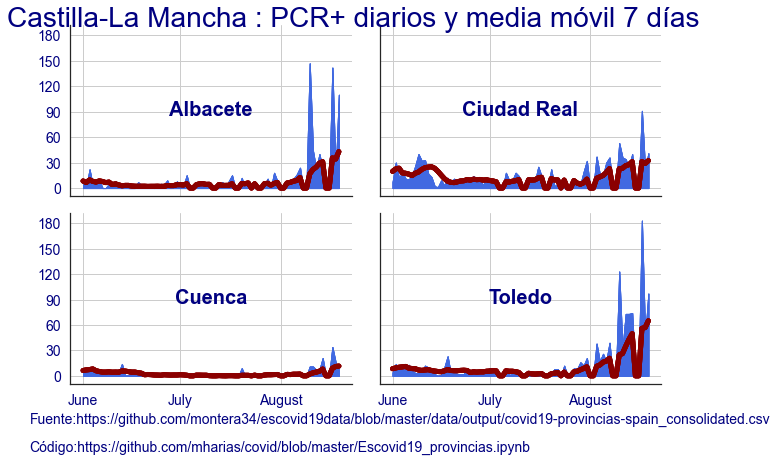

In [374]:
# Preparamos los datos

provincias=['Albacete','Ciudad Real','Cuenca','Toledo']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=6,day=1)) & (datos['province'].isin(provincias))]
clave_avg='daily_cases_PCR_avg7'
clave = 'daily_cases_PCR'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'

# Creamos la figura desde Matplotlib
plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=2,aspect=1.5, height=3, palette=pal)
# Título
g.fig.suptitle('Castilla-La Mancha : PCR+ diarios y media móvil 7 días',fontsize=28,color=color_titulos)
g.fig.text(0.0, 0.025, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
       fontsize=14,color=color_titulos)

g.fig.text(0.0,-0.05,'Código:{}'.format(github_url),
           fontsize=14,horizontalalignment='left',color=color_titulos)

# Draw the densities in a few steps



for i in range(len(provincias)):
    g.map(plt.fill_between, 'date',clave,color=color_diarios)
    g.map(plt.plot, 'date',clave_avg,color=color_avg,lw=5)
#g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold",
            ha="center", va="center", size=20,transform=ax.transAxes,color=color_titulos)

g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0.1,wspace=.1)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
g.set(yticks=[])
g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...
XmajorFmt = DateFormatter('%B')
for ax in g.axes:
    ax.xaxis.set_major_formatter(XmajorFmt)
    ax.xaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.xaxis.set_major_locator(DayLocator([1]))
    
    ax.yaxis.set_tick_params(labelsize=14,labelcolor=color_titulos)
    ax.yaxis.set_major_locator(plt.MaxNLocator(8))
    ax.grid()


plt.show()